# Laboratory Session 4

## Exercise 1 - Six Boxes Toy Model : inference
Write an R program that:
1) allows the user to insert the color of a randomly extracted box and

2) prints on the standard output the probability of selecting each box

3) plots the probability for each box as a function of the extraction step

In [1]:
# How many draws? N
# read draw
# show how likely is each box
# plot
box_posts <- function(ex, priors){
    lhoods <- 1*ex+(-1)**ex*5:0/5
    almost_posts <- lhoods*priors
    evidence <- sum(almost_posts)
    posts <- almost_posts/evidence
    return(posts)
}

missing_draws <- TRUE
N <- 0
n_boxes <- 6
priors <- rep(1/n_boxes,6)
while(missing_draws){
    new_draw <- readline(prompt = "What's the color? 1 for white, 0 for black.")
    ex <- as.integer(new_draw)
    priors <- box_posts(ex,priors)
    print(priors)
    missing_draws <- (readline(prompt = "Are there any further extractions? 1 if yes, any other value if not."))
    if(missing_draws==1){
        missing_draws <- TRUE
    }
    else{
        missing_draws <- FALSE
    }
}

[1] 0.00000000 0.06666667 0.13333333 0.20000000 0.26666667 0.33333333
[1] 0.0 0.2 0.3 0.3 0.2 0.0
[1] 0.00 0.08 0.24 0.36 0.32 0.00
[1] 0.0000000 0.1538462 0.3461538 0.3461538 0.1538462 0.0000000
[1] 0.00000000 0.06153846 0.27692308 0.41538462 0.24615385 0.00000000


## Exercise 2 - Six Boxes Toy Model: simulation
Consider again the six boxes toy model of the previous exercise and write a simulation
program that:
1) selects a random box
2) makes random sampling from the box
3) prints on the standard output the probability of selecting each box
4) plots the probability for each box as a function of the number of trial

In [2]:
library(ggplot2)
library(reshape2)
library(tibble)

six_boxes <- function(extractions){

    n_boxes <- 6
    box_size <- n_boxes-1
    # The prior is the same for each box
    p_box <- 1/n_boxes

    p_w <- sum(0:box_size)*p_box/box_size
    p_b <- 1 - p_w
    # with the assumption for the balls distribution
    
    prior <- p_box
    posteriors <- matrix(rep(prior,n_boxes*(length(extractions)+1)),c(length(extractions)+1,n_boxes))
    for(i in 1:length(extractions)){
        ex <- extractions[i]
        priors <- posteriors[i,]
        posteriors[i+1,] <- box_posts(ex,priors)
    }
    
    posteriors <- tibble(as.data.frame(posteriors))
    colnames(posteriors) <- c('H_0', 'H_1', 'H_2', 'H_3', 'H_4', 'H_5')
    posteriors['Extraction'] <- 0:length(extractions)
    df <- melt(posteriors, id.vars='Extraction', variable.name = 'series')
    plotties <- ggplot(df, aes(Extraction,value)) + geom_line(aes(colour = series)) + ggtitle('Posterior probability for each box')
    plot(plotties)
    return(posteriors)
}

extractions <- function(size){
    box_number <- sample(0:5,1)
    box <- rep(0,5)
    if(box_number>0) box[1:box_number] <- rep(1,box_number)

    message('Sampling ', size, ' times from box ', box_number)
    return(sample(box,size,replace=TRUE))
}

simulate <- function(size){
    balls <- extractions(size)
    six_boxes(balls)
}

Sampling 12 times from box 0



H_0,H_1,H_2,H_3,H_4,H_5,Extraction
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.1666667,0.16666667,0.166666667,1.666667e-01,1.666667e-01,0.1666667,0
0.3333333,0.26666667,0.200000000,1.333333e-01,6.666667e-02,0.0000000,1
0.4545455,0.29090909,0.163636364,7.272727e-02,1.818182e-02,0.0000000,2
0.5555556,0.28444444,0.120000000,3.555556e-02,4.444444e-03,0.0000000,3
0.6384065,0.26149132,0.082737487,1.634321e-02,1.021450e-03,0.0000000,4
0.7062147,0.23141243,0.054915254,7.231638e-03,2.259887e-04,0.0000000,5
0.7616378,0.19965879,0.035534974,3.119669e-03,4.874482e-05,0.0000000,6
0.8068681,0.16921250,0.022587142,1.321973e-03,1.032791e-05,0.0000000,7
0.8437208,0.14155286,0.014171269,5.529408e-04,2.159925e-06,0.0000000,8


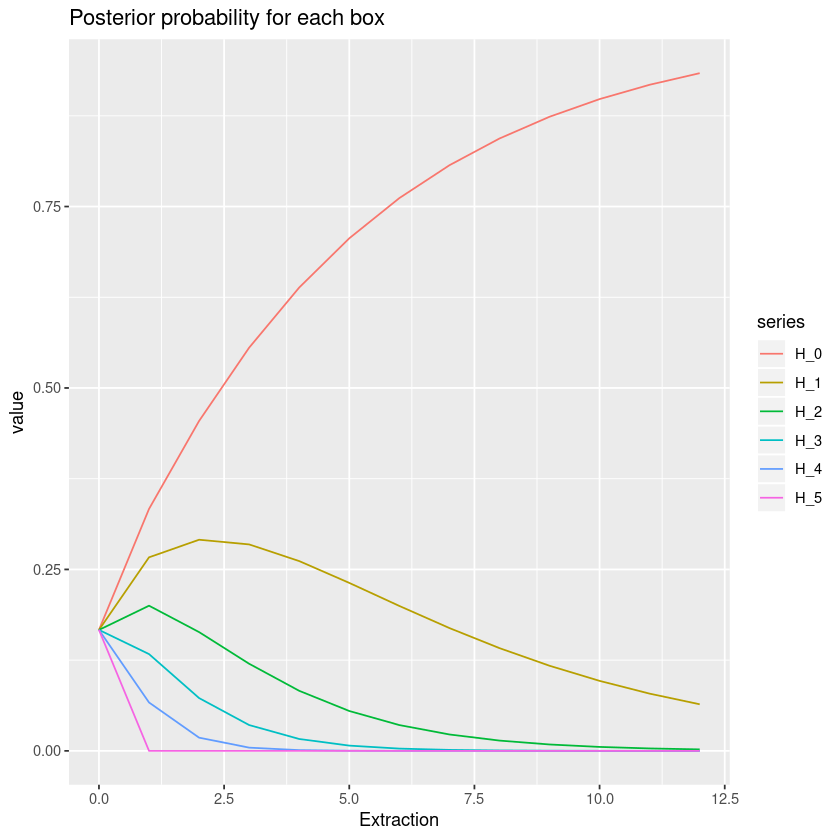

In [3]:
simulate(12)

## Exercise 3
- An important property of the gamma distribution is the so-called _reproductive property_
- given a sequence of independent random variable $X_j ∼ \text{Gamma}(\alpha_j, \beta)$, it follows that
$$
\begin{align}
Y=\sum_j X_j\to Y ~ \text{Gamma}(\alpha,\beta), \alpha = \sum_j \alpha_j
\end{align}
$$
if $\alpha = m$ is an integer, a random variable from gamma distribution $\text{Gamma}(m, \beta)$ (also known as Erlang distribution) can be obtained by summing m independent exponential
random variables $X_j ∼ \text{Exp}(\beta)$:
$$
\begin{align}
Y=\frac{1}{\beta}\sum_j(-\ln U_j)=-\frac{1}{\beta}\ln\prod_j U_j
\end{align}
$$

Write an algorithm to sample variables from an Erlang distribution $\text{Gamma}(m, \beta)$


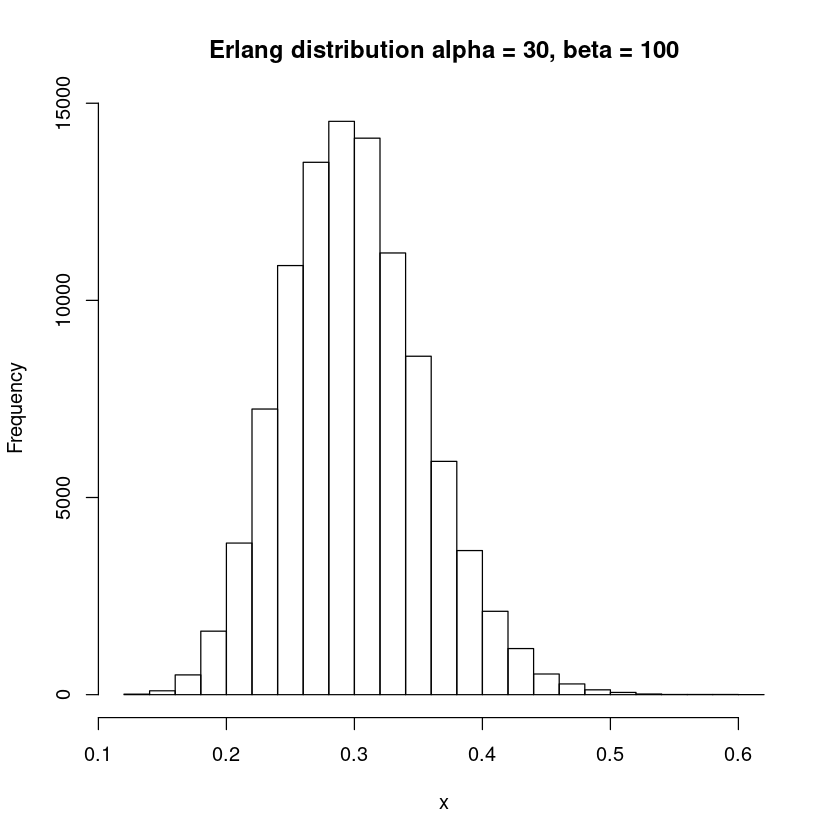

In [4]:
int_erlang <- function(N,m,bet) replicate(N,-sum(log(runif(m)))/bet)
hist(int_erlang(100000,30,100), main = 'Erlang distribution alpha = 30, beta = 100', xlab = 'x')

## Exercise 4
One of the first random number generator was proposed by von Neumann, the so-called middle square algorithm.

Write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

In [5]:
mid_sq_alg <- function(input){
    in_digits <- length(unlist(strsplit(as.character(input),"")))
    number <- unlist(strsplit(as.character(input**2),""))
    sq_digits <- length(number)
    i <- 2
    # If the current start digit of the squared number is zero,
    # we review whether there would be enough digits left to trim if we started from the next digit.
    # We are trying to get a number with the same number of digits as the input, not more, not less.
    while(number[i]=='0' & in_digits+i<sq_digits){
        i <- i+1
    }
    new_number <- number[i:(in_digits+i-1)]
    new_number <- as.numeric(paste(new_number, collapse=""))
    return(new_number)
}


In [6]:
mid_sq_alg(123098)

[1] 515311